In [26]:
import numpy as np
import matplotlib.pyplot as plt
import time
from qiskit import QuantumCircuit, transpile, Aer, execute
from qiskit import *
from qiskit.circuit.library import *
from qiskit.providers.aer import *

In [27]:
backend_cuquantum = Aer.get_backend('aer_simulator')
backend_cuquantum.set_options(device='GPU', method='statevector', cuStateVec_enable=True)

In [28]:
backend_gpu = Aer.get_backend('aer_simulator')
backend_gpu.set_options(device='GPU', method='statevector', cuStateVec_enable=False)

In [29]:
backend_cpu = Aer.get_backend('aer_simulator')
backend_cpu.set_options(device='CPU', method='statevector')

In [30]:
def quantum_volume_circuit(num_qubits, depth):
    circuit = QuantumCircuit(num_qubits, num_qubits)
    
    for d in range(depth):
        for qubit in range(num_qubits):
            circuit.h(qubit)  # Apply Hadamard gate to all qubits
        for qubit in range(num_qubits - 1):
            circuit.cx(qubit, qubit + 1)  # Apply CNOT gates between adjacent qubits
    
    return circuit

In [31]:
# Define the range of qubit counts
qubit_counts = list(range(15, 30))
depth = 10

# Initialize lists to store execution times
execution_times_cuquantum = []
execution_times_gpu = []
execution_times_cpu = []

# Loop through different qubit counts
for num_qubits in qubit_counts:
    # Create the Quantum Volume circuit
    qv_circuit = quantum_volume_circuit(num_qubits, depth)

    #cuQuantum
    transpiled_cuquantum = transpile(qv_circuit, backend_cuquantum)
    start_time = time.time()
    job = execute(transpiled_cuquantum, backend_cuquantum, shots=1024)
    job.result()
    end_time = time.time()
    execution_times_cuquantum.append(end_time - start_time)

    #GPU
    transpiled_gpu = transpile(qv_circuit, backend_gpu)
    start_time = time.time()
    job = execute(transpiled_gpu, backend_gpu, shots=1024)
    job.result()
    end_time = time.time()
    execution_times_gpu.append(end_time - start_time)

    #CPU
    transpiled_cpu = transpile(qv_circuit, backend_cpu)
    start_time = time.time()
    job = execute(transpiled_cpu, backend_cpu, shots=1024)
    job.result()
    end_time = time.time()
    execution_times_cpu.append(end_time - start_time)

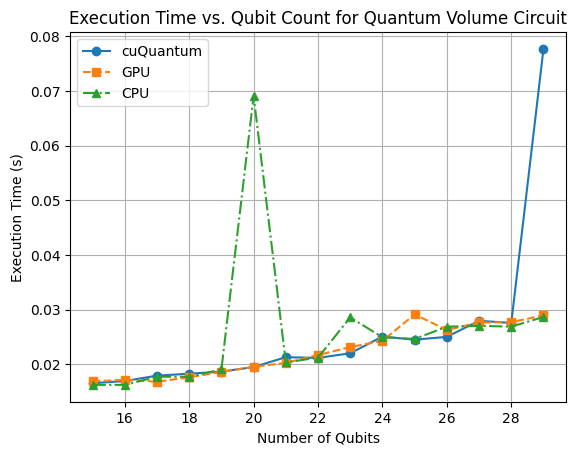

In [32]:
# Plot the execution times for all backends
plt.plot(qubit_counts, execution_times_cuquantum, label='cuQuantum', marker='o', linestyle='-')
plt.plot(qubit_counts, execution_times_gpu, label='GPU', marker='s', linestyle='--')
plt.plot(qubit_counts, execution_times_cpu, label='CPU', marker='^', linestyle='-.')
plt.xlabel('Number of Qubits')
plt.ylabel('Execution Time (s)')
plt.title('Execution Time vs. Qubit Count for Quantum Volume Circuit')
plt.legend()
plt.grid(True)
plt.show()

/home/manoj_raga/miniforge3/lib/python3.10/site-packages/qiskit/tools/jupyter/library.py:39: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()


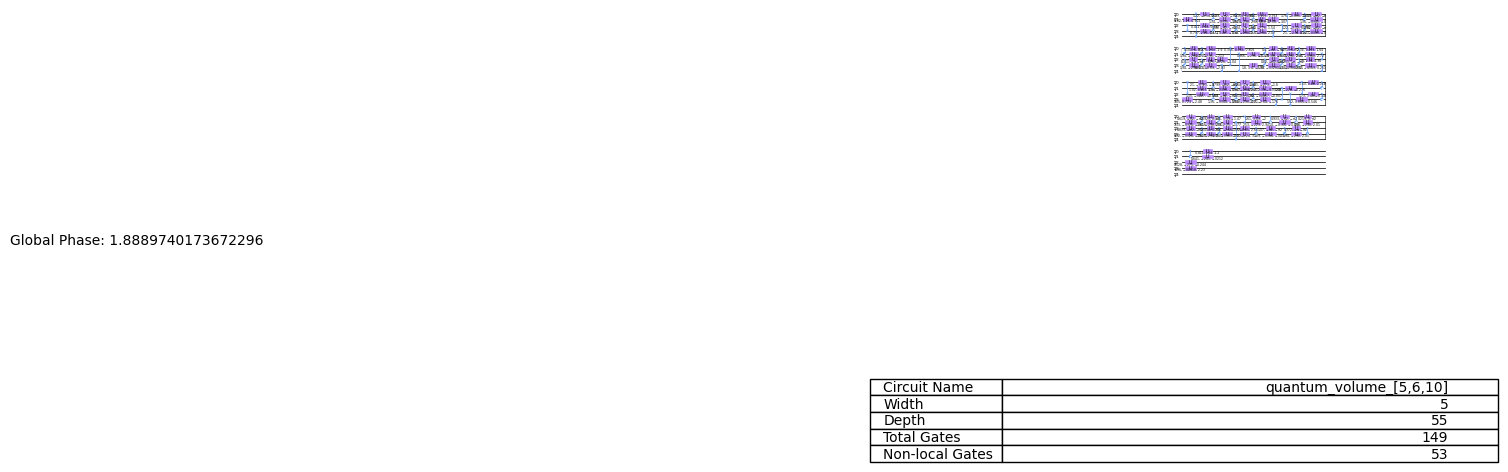

In [33]:
from qiskit.circuit.library import QuantumVolume
from qiskit.tools.jupyter.library import _generate_circuit_library_visualization
circuit = QuantumVolume(5, 6, seed=10, classical_permutation=False)
_generate_circuit_library_visualization(circuit.decompose())